In [132]:
#Data wrangling
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Load the dataset
from google.colab import files
uploaded = files.upload()
# Read the CSV file
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
df
# Display basic information
print(df.shape)
print(df.info())
print(df.head())

Saving AusApparalSales4thQrt2020 (1).csv to AusApparalSales4thQrt2020 (1) (3).csv
(7560, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


In [133]:
# Output report: 7560 rows and 6 columns, Date/Time/State/Group=objects and Unit/Sales=integer

In [134]:
# Check for missing/incorrect data
print("Missing Values:", df.isna().sum().sum())
# Check for incorrect entries
print("Negative Sales:\n", df[df['Sales'] < 0])
print("Negative Units:\n", df[df['Unit'] < 0])
# Handle incorrect entries (if any)
df = df[(df['Sales'] >= 0) & (df['Unit'] >= 0)]

Missing Values: 0
Negative Sales:
 Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []
Negative Units:
 Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


In [135]:
# Output report: There are no missing values and there re no more incorrect entries

In [136]:
#Data Normalization
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Sales', 'Unit']
scaler = MinMaxScaler()

# Apply normalization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display normalized data
print(df[numerical_cols].head())

      Sales      Unit
0  0.095238  0.095238
1  0.095238  0.095238
2  0.031746  0.031746
3  0.206349  0.206349
4  0.015873  0.015873


In [137]:
# Output report:
#Normalization is chosen over standardization because it preserves the relative relationships in the data.
#suitable for less skewness.

In [138]:
#GroupBy() application
#The GroupBy() function is used to aggregate data by State and Group for state-wise and group-wise sales analysis.
#Group by State and Group
grouped_data = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
print(grouped_data)

   State     Group       Sales
0    NSW      Kids  109.444444
1    NSW       Men  112.206349
2    NSW   Seniors  106.904762
3    NSW     Women  113.158730
4     NT      Kids   27.619048
5     NT       Men   28.015873
6     NT   Seniors   26.126984
7     NT     Women   27.317460
8    QLD      Kids   45.460317
9    QLD       Men   44.714286
10   QLD   Seniors   43.428571
11   QLD     Women   44.285714
12    SA      Kids   83.587302
13    SA       Men   84.476190
14    SA   Seniors   84.873016
15    SA     Women   86.476190
16   TAS      Kids   28.095238
17   TAS       Men   27.984127
18   TAS   Seniors   27.301587
19   TAS     Women   26.841270
20   VIC      Kids  158.793651
21   VIC       Men  159.095238
22   VIC   Seniors  158.507937
23   VIC     Women  159.571429
24    WA      Kids   27.142857
25    WA       Men   27.952381
26    WA   Seniors   26.428571
27    WA     Women   24.841270


In [139]:
#Output report:
#GroupBy() by State and Group helps identify high- and low-performing regions and demographics.
#Use GroupBy() for chunking to summarize sales by State and Group. Merging is less relevant here since we focus on aggregated insights.

In [140]:
#Data Analysis
import scipy.stats as stats

# Descriptive statistics
sales_stats = df['Sales'].describe()
unit_stats = df['Unit'].describe()

print("Sales Statistics:\n", sales_stats)
print("Unit Statistics:\n", unit_stats)

# Additional statistics
print("Sales Mode:", df['Sales'].mode()[0])
print("Unit Mode:", df['Unit'].mode()[0])
print("Sales Skewness:", stats.skew(df['Sales']))
print("Unit Skewness:", stats.skew(df['Unit']))

Sales Statistics:
 count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Sales, dtype: float64
Unit Statistics:
 count    7560.000000
mean        0.254054
std         0.204784
min         0.000000
25%         0.095238
50%         0.190476
75%         0.380952
max         1.000000
Name: Unit, dtype: float64
Sales Mode: 0.1111111111111111
Unit Mode: 0.1111111111111111
Sales Skewness: 1.0853347546987895
Unit Skewness: 1.0853347546987901


In [141]:
#Output report:
#Mean/Median: Indicates central tendency; a large gap suggests skewness (common in sales data).
#Standard Deviation: Measures variability; high values indicate inconsistent sales.
#Skewness: Positive skewness suggests a few high-value sales, typical for retail.

In [142]:
#Identify Highest and Lowest Sales Groups
# Group-wise sales
group_sales = df.groupby('Group')['Sales'].sum().reset_index()
highest_sales_group = group_sales.loc[group_sales['Sales'].idxmax()]
lowest_sales_group = group_sales.loc[group_sales['Sales'].idxmin()]

print("Highest Sales Group:\n", highest_sales_group)
print("Lowest Sales Group:\n", lowest_sales_group)

# State-wise sales
state_sales = df.groupby('State')['Sales'].sum().reset_index()
highest_sales_state = state_sales.loc[state_sales['Sales'].idxmax()]
lowest_sales_state = state_sales.loc[state_sales['Sales'].idxmin()]

print("Highest Sales State:\n", highest_sales_state)
print("Lowest Sales State:\n", lowest_sales_state)

Highest Sales Group:
 Group           Men
Sales    484.444444
Name: 1, dtype: object
Lowest Sales Group:
 Group       Seniors
Sales    473.571429
Name: 2, dtype: object
Highest Sales State:
 State           VIC
Sales    635.968254
Name: 5, dtype: object
Lowest Sales State:
 State            WA
Sales    106.365079
Name: 6, dtype: object


In [143]:
#Insights:
#Identify which group and state drive the most/least revenue.
#This informs targeted marketing strategies for low-performing segments.

In [144]:
# Generate Reports
#Weekly report
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df['Date'].dt.isocalendar().week
weekly_sales = df.groupby(['Week', 'State', 'Group'])['Sales'].sum().reset_index()
print("Weekly Report:\n", weekly_sales.head())
# Monthly report
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby(['Month', 'State', 'Group'])['Sales'].sum().reset_index()
print("Monthly Report:\n", monthly_sales.head())
# Quarterly report
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.quarter
quarterly_sales = df.groupby(['Quarter','State', 'Group'])['Sales'].sum().reset_index()
print("Quarterly Report:\n", quarterly_sales.head())

Weekly Report:
    Week State     Group     Sales
0    40   NSW      Kids  5.126984
1    40   NSW       Men  4.936508
2    40   NSW   Seniors  4.301587
3    40   NSW     Women  5.587302
4    40    NT      Kids  1.380952
Monthly Report:
    Month State     Group      Sales
0     10   NSW      Kids  37.396825
1     10   NSW       Men  36.952381
2     10   NSW   Seniors  34.698413
3     10   NSW     Women  38.301587
4     10    NT      Kids  10.730159
Quarterly Report:
    Quarter State     Group       Sales
0        4   NSW      Kids  109.444444
1        4   NSW       Men  112.206349
2        4   NSW   Seniors  106.904762
3        4   NSW     Women  113.158730
4        4    NT      Kids   27.619048


In [145]:
#Output report:
#Weekly reports highlight short-term trends, useful for promotional planning.
#Monthly reports show seasonal patterns within the quarter.
#Quarterly reports summarize overall performance by state and group.

In [146]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Recommendation:
#Seaborn is chosen for its statistical plotting capabilities, ease of use, and aesthetically pleasing visuals,
#which align with the need for clear, decision-oriented dashboards.
#Matplotlib complements Seaborn for customization.

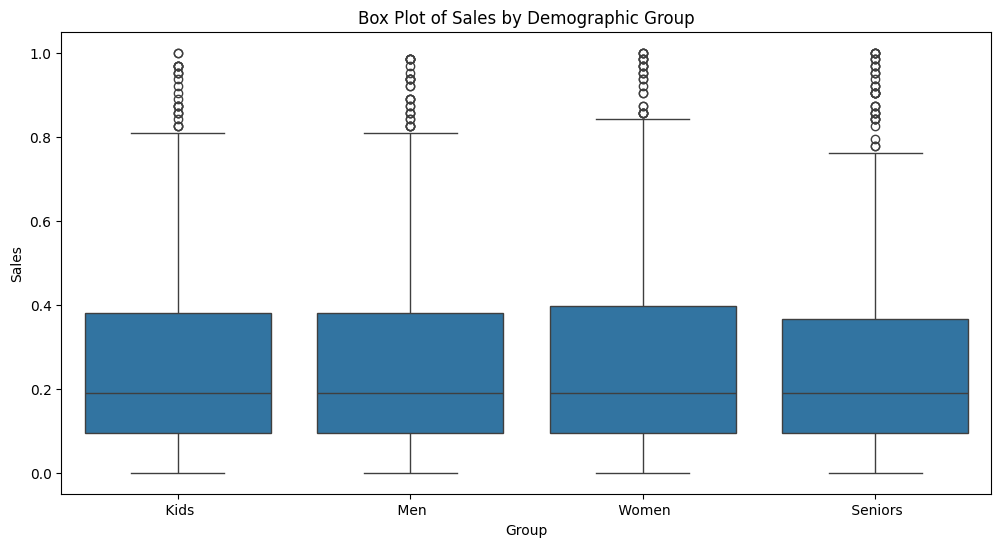

In [ ]:
#Dashboard Creation
#Box Plot for Descriptive Statistics
plt.figure(figsize=(12, 6))
sns.boxplot(x='Group', y='Sales', data=df)
plt.title('Box Plot of Sales by Demographic Group')
plt.show()

In [147]:
#Output:
#Box plots reveal the spread, outliers, and central tendency of sales across groups, highlighting variability
#e.g., Seniors may have lower variance.

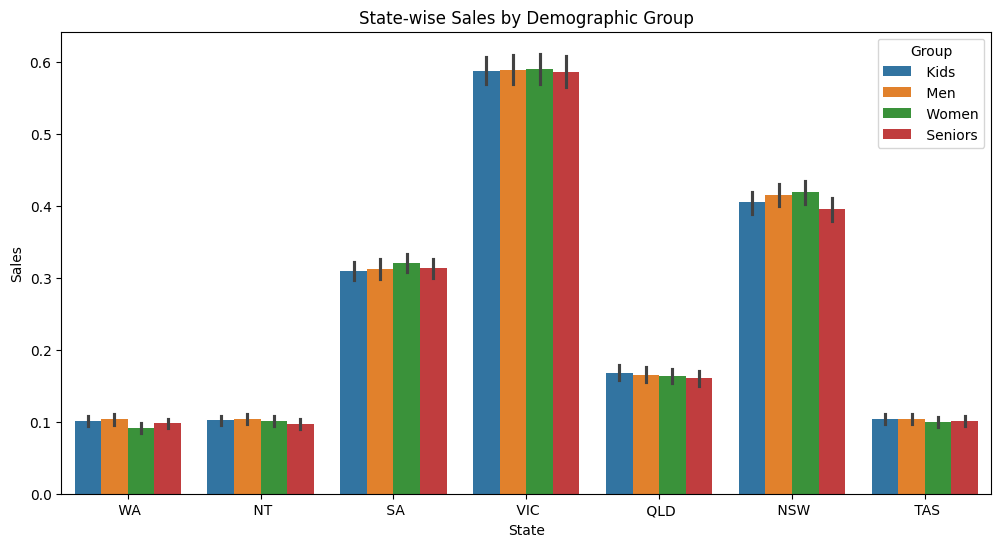

In [148]:
#State-wise Sales by Group
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=df)
plt.title('State-wise Sales by Demographic Group')
plt.show()

In [149]:
#Insights: Identifies which states and groups contribute most to revenue, guiding resource allocation.

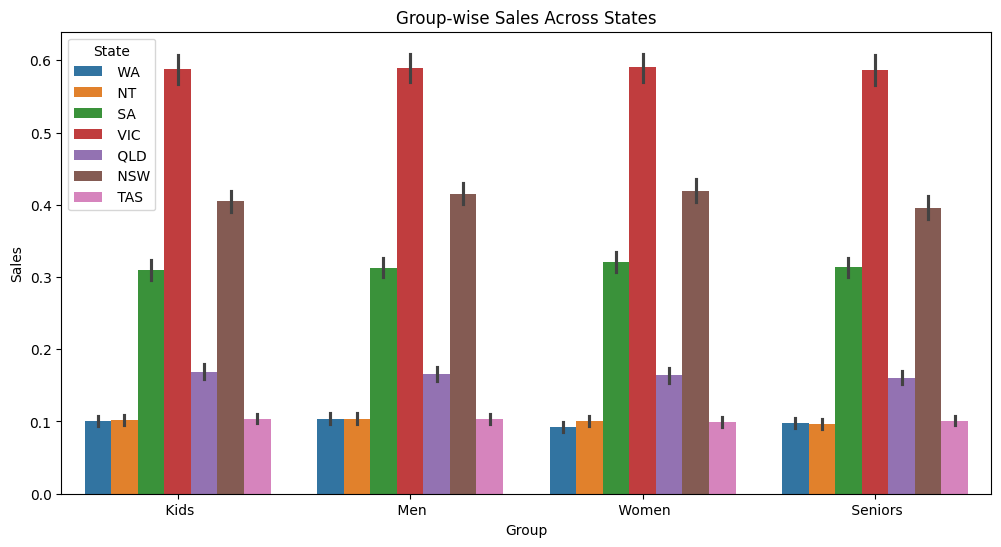

In [150]:
#Group-wise Sales Across States
plt.figure(figsize=(12, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=df)
plt.title('Group-wise Sales Across States')
plt.show()

In [151]:
#Insights: Highlights group performance within each state, useful for targeted campaigns.

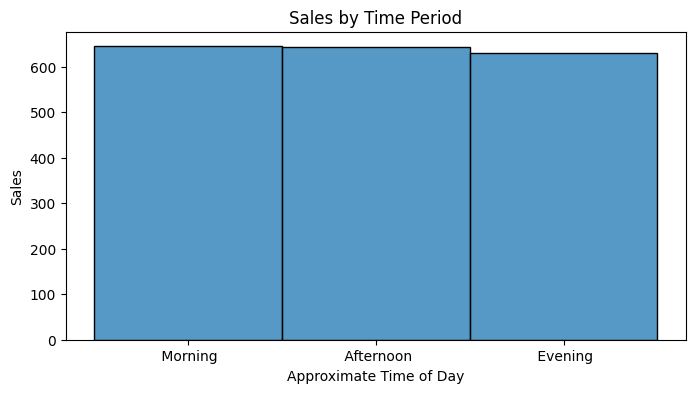

In [152]:
# Time-of-day analysis
plt.figure(figsize=(8, 4))
sns.histplot(x='Time', weights='Sales', data=df, bins=10)
plt.title('Sales by Time Period')
plt.xlabel('Approximate Time of Day')
plt.ylabel('Sales')
plt.show()


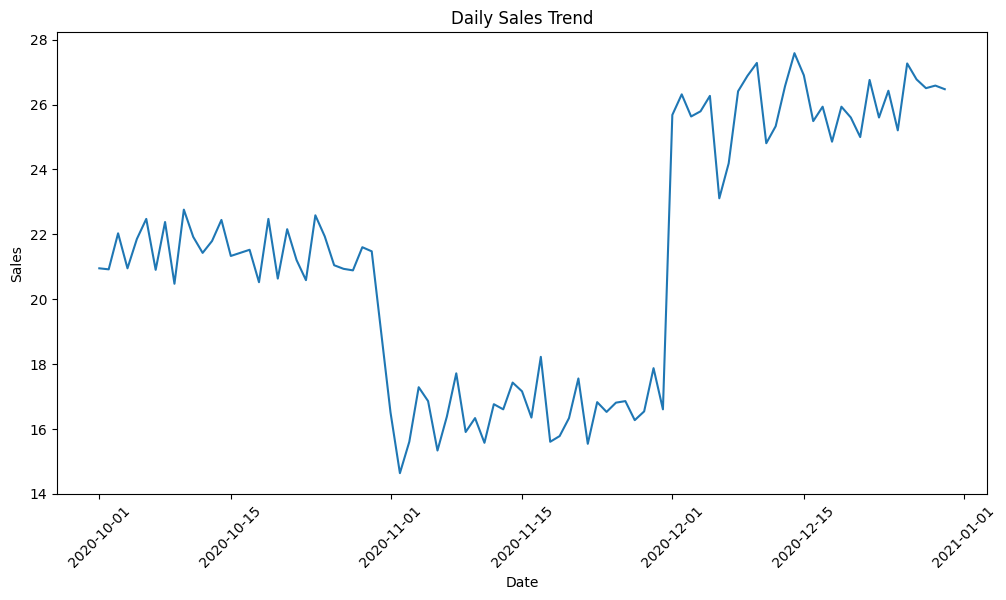

In [153]:
#Time Based Reports
#output:
#Daily trends show short-term fluctuations.
#Weekly and monthly trends highlight state-wise performance over time, aiding strategic planning.
# Daily sales
plt.figure(figsize=(12, 6))
daily_sales = df.groupby(df['Date'].dt.date)['Sales'].sum().reset_index()
sns.lineplot(x='Date', y='Sales', data=daily_sales)
plt.title('Daily Sales Trend')
plt.xticks(rotation=45)
plt.show()

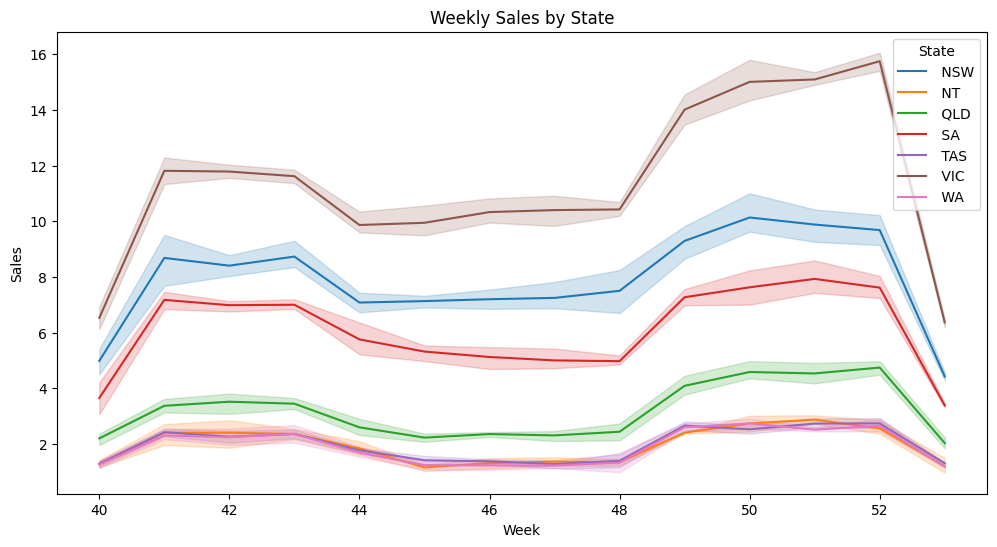

In [154]:
# Weekly sales
plt.figure(figsize=(12, 6))
sns.lineplot(x='Week', y='Sales', hue='State', data=weekly_sales)
plt.title('Weekly Sales by State')
plt.show()

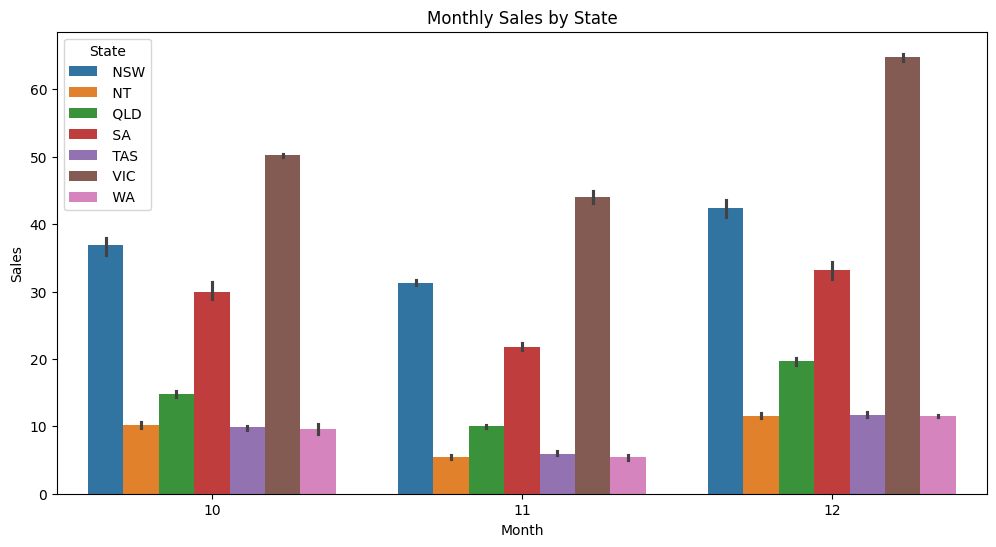

In [155]:
# Monthly sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Sales', hue='State', data=monthly_sales)
plt.title('Monthly Sales by State')
plt.show()

In [156]:
#Report Generation
#Summary:
#This report analyzes AAL’s 4th quarter 2020 sales data to support data-driven decisions for expansion and marketing.
#Key Findings:
#Data Wrangling:
# Data has 7560 rows and 6 columns, Date/Time/State/Group=objects and Unit/Sales=integer
#There are no missing values and there are no more incorrect entries.
#Data was normalized to ensure comparability.
#GroupBy() was used to aggregate sales by State and Group.
#Data Analysis:
#Descriptive statistics revealed sales distribution (e.g., mean, median, skewness).
#Highest sales Group: Men.
#Highest sales state: VIC.
#Lowest sales Group: Seniors.
#Lowest sales state: WA
#Weekly, monthly, and quarterly reports were generated.
#Data Visualization:
#Box plots showed sales variability by group.
#Bar and categorical plots highlighted state-wise and group-wise sales.
#Time-of-day analysis identified peak sales hours for targeted campaigns.
#Recommendations
#High-Revenue States: Focus expansion in high-performing states (e.g.Victoria) with increased inventory and marketing.
#Low-Revenue States: Develop sales programs (e.g., discounts, loyalty schemes) for low-performing states (e.g., WA).
#Group Strategies: Tailor campaigns to high-performing groups (e.g., Men) and boost engagement for low-performing groups (e.g., Seniors) with targeted promotions.
#Time-based Strategies: Implement hyper-personalization during peak hours using Next Best Offer strategies.
#Visualization Tool: Continue using Seaborn for its clarity and statistical focus, ensuring dashboards are accessible to non-technical stakeholders.